In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'DeepMicroC-master'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/DeepMicroC-master


In [2]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from torch import optim
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from tqdm.autonotebook import tqdm


In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
train_data = np.load('data/train_data.npz')
hff_data = np.load('data/HFF.npz')

In [76]:
train = torch.tensor(train_data['train'][::10], dtype=torch.float)

In [77]:
target = train_data['target'][::10]
target = target.reshape(len(target), -1)

In [62]:
from models.deephic import Generator, Discriminator

try:
  
  netG = Generator(scale_factor=1, in_channel=1, resblock_num=5).to(device)
  netD = Discriminator(in_channel=1).to(device)
  netG.load_state_dict(torch.load('models/generator.pt',map_location=device))
  netD.load_state_dict(torch.load('models/discriminator.pt', map_location=device))
  print('loaded saved models')

except:
  print('new models')
  netG = Generator(scale_factor=1, in_channel=1, resblock_num=5).to(device)
  netD = Discriminator(in_channel=1).to(device)

loaded saved models


In [78]:
predictions = np.zeros(target.shape, dtype='float32')

In [79]:
netG.eval()

Generator(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (resblocks): Sequential(
    (0): residualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): residualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): residualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(

In [80]:
for i in tqdm(range(0, len(target), 8)):
  predicted_mat = netG(train[i:i+8].to(device)).data.cpu().numpy()

  predictions[i:i+8] = predicted_mat.reshape(len(predicted_mat), -1)

  0%|          | 0/147 [00:00<?, ?it/s]

In [81]:
from sklearn.metrics import pairwise_distances

In [82]:
p_norm = predictions/np.linalg.norm(predictions, axis=1, keepdims=True)
t_norm = target/np.linalg.norm(target, axis=1, keepdims=True)

In [83]:
dist1 = pairwise_distances(p_norm, t_norm, metric='l2')
dist2 = pairwise_distances(t_norm, t_norm, metric='l2')

Text(0, 0.5, 'prediction')

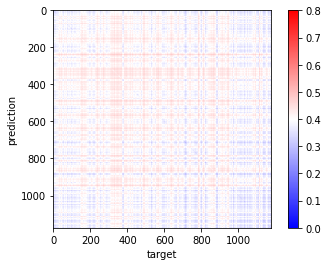

In [87]:
plt.imshow(dist1, vmin=0, vmax=0.8, cmap='bwr')
plt.colorbar()
plt.xlabel('target')
plt.ylabel('prediction')

Text(0, 0.5, 'prediction')

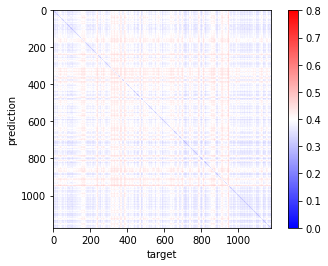

In [74]:
plt.imshow(dist2, vmin=0, vmax=0.8, cmap='bwr')
plt.colorbar()
plt.xlabel('target')
plt.ylabel('prediction')

In [88]:
np.sum(np.argmin(dist1, axis=1) == np.arange(0, len(dist1)))/len(dist1)

0.571063829787234